# ESS Immigration

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from essutils import utils

## Import immigration data from *European Social Survey*
* This contains data on various countries from Rounds 1 and 7 (2002 and 2014)
* Some countries are missing data from one or the other round

In [2]:
imm = utils.get_data(utils.IMMDATA)

In [3]:
imm.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'acetalv',
       'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr', 'imtcjob',
       'imwbcrm', 'lwdscwp', 'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt',
       'qfimedu', 'qfimlng', 'qfimwht', 'qfimwsk'],
      dtype='object')

## The following countries are represented

In [9]:
countries = imm.cntry.unique()

array(['AT', 'BE', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB',
       'GR', 'HU', 'IE', 'IL', 'IT', 'LT', 'LU', 'NL', 'NO', 'PL', 'PT',
       'SE', 'SI'], dtype=object)

### Country Groups

In [10]:
VISEGRAD = ["PL", "HU", "CZ"]
BENELUX = ["BE", "NL", "LU"]
CORE = ["DE", "FR", "IT"]
NORDIC = ["DK", "NO", "SE"]
SOUTH = ["ES", "PT", "GR", "IT", "SI"]
BALTIC = ["EE", "FI", "LT"]
OTHER = ["CH", "GB", "IE", "IL"]

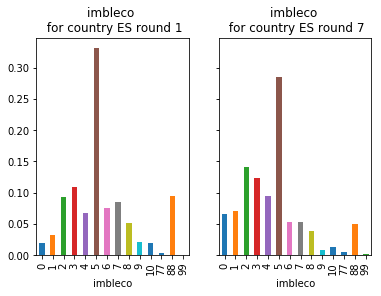

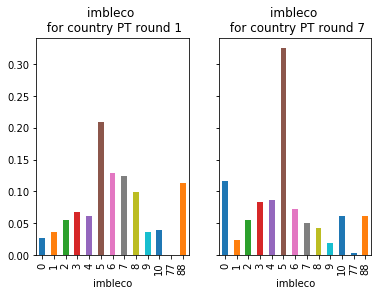

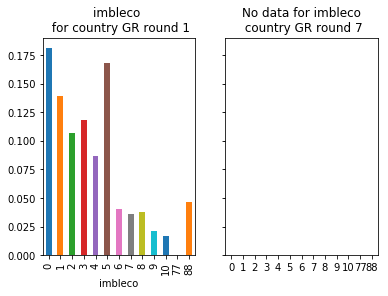

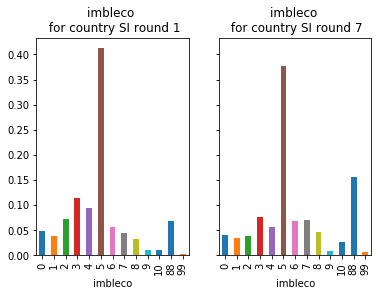

In [17]:
utils.barplot(imm, "imbleco", countries=SOUTH)

In [5]:
c = utils.get_wtd_val_cts(imm, 'PL', 7, 'eimpcnt')

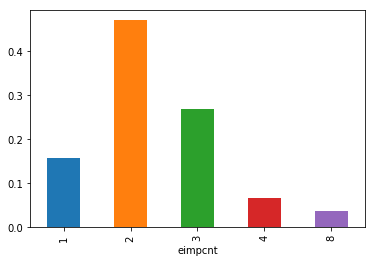

In [6]:
c.plot(kind='bar')

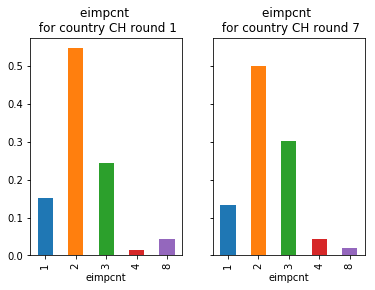

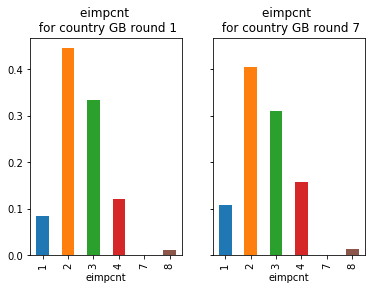

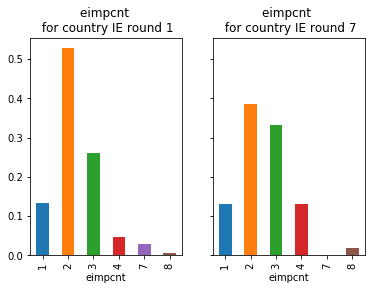

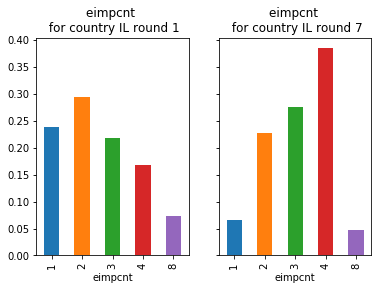

In [12]:
utils.barplot(imm, "eimpcnt", countries=OTHER)

In [182]:
def df2responses(dfin, cntry, rnd, var):
    edata = utils.get_wtd_val_cts(dfin, cntry, rnd, var)
    edata.rename_axis("response", inplace=True)
    df = edata.to_frame() # pd.DataFrame(data={'imbleco': edata.data, 'cntry': 'HU'})
    df["cntry"] = cntry
    df = df.reset_index()
    return df

In [192]:
df = df2responses(imm, "IL", 7, "imbleco")

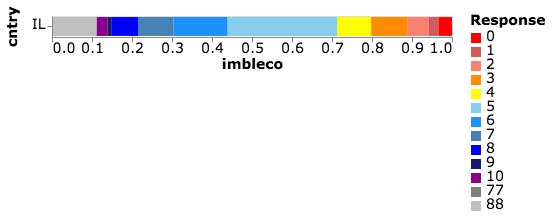

In [196]:
import altair as alt

color_scale = alt.Scale(
            domain=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 77, 88],
            range=["red", "indianred", "salmon", "darkorange", "yellow", 'skyblue', "dodgerblue",
                   "steelblue", 'blue', 'midnightblue', "darkmagenta", "gray", "silver"]
        )
alt.Chart(df).mark_bar().encode(
    x='imbleco',
    y='cntry',
    color=alt.Color(
        'response:O',
        legend=alt.Legend(title='Response'),
        scale=color_scale,
    )
)

In [202]:
dfcz = df2responses(imm, "CZ", 7, "imbleco")
dfhu = df2responses(imm, "HU", 7, "imbleco")
dfpl = df2responses(imm, "PL", 7, "imbleco")
dfco = pd.concat([dfcz, dfhu, dfpl])

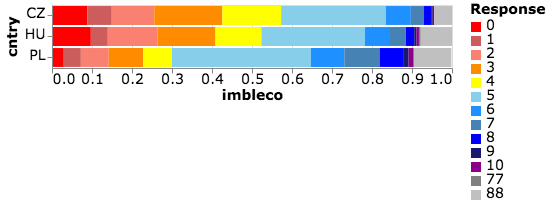

In [207]:
alt.Chart(dfco).mark_bar().encode(
    x='imbleco',
    y='cntry',
    order=alt.Order('response', sort='ascending'),
    color=alt.Color(
        'response:O',
        legend=alt.Legend(title='Response'),
        scale=color_scale,
    )
)

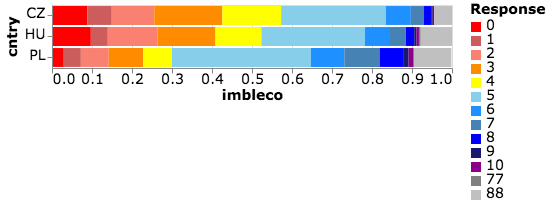

In [217]:
utils.plot_stacked_bars(dfco)

In [231]:
dfv = utils.countries_to_plotting_frame(imm, SOUTH, 1, 'imdetbs')

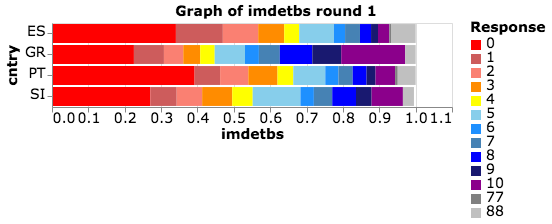

In [239]:
utils.plot_stacked_bars(dfv)